# Modul 3 Metode Numerik: Diferensiasi Numerik, Ekstrapolasi Richardson

Kembali ke [Metode Numerik](./metnum2024genap.qmd)

1. Turunan/Diferensiasi Numerik
2. Pengantar Ekstrapolasi Richardson (penjelasan tanpa kode)
3. Ekstrapolasi Richardson khusus rumus *forward/backward-difference*
4. Ekstrapolasi Richardson dengan $N_1 \left( \frac{h}{2} \right)$, dari $O(h)$ menjadi $O(h^2)$
5. Ekstrapolasi Richardson untuk *truncation error* $O\left(h^{2j}\right)$ (pangkat genap)

# Turunan/Diferensiasi Numerik

Untuk step size $h \ne 0$ (boleh positif maupun negatif), rumus-rumus berikut ini bisa digunakan untuk mengaproksimasi turunan.

***a. Forward/Backward-Difference***

***truncation error:*** $O\left(h\right)$

$$f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$

*truncation term:* $-\frac{h}{2}f''(\xi) = O\left(h\right)$

Rumus diferensiasi numerik yang paling sederhana, yaitu sesuai definisi turunan, dengan nilai $h$ yang dekat dengan nol (sayangnya tidak bisa dibuat limit $h$ menuju nol). Rumus di atas disebut *forward-difference formula* jika $h > 0$, dan disebut *backward-difference formula* jika $h < 0$.

***b. Three-Point Formulas***

***truncation error:*** $O\left(h^2\right)$

* *Three-Point Endpoint* (TPEP):
$$f'(x_0) \approx \frac{1}{2h} \left[-3f(x_0) +4f(x_0+h) - f(x_0+2h)\right]$$

*truncation term* (TPEP): $\frac{h^2}{3}f^{(3)}(\xi) = O\left(h^2\right)$

* *Three-Point Midpoint* (TPMP), juga disebut *centered-difference formula*:
$$f'(x_0) \approx \frac{1}{2h} \left[f(x_0 + h) -f(x_0 - h)\right]$$

*truncation term* (TPMP): $-\frac{h^2}{6}f^{(3)}(\xi) = O\left(h^2\right)$

***c. Five-Point Formulas***

***truncation error:*** $O\left(h^4\right)$

* *Five-Point Endpoint* (FPEP):
$$f'(x_0) \approx \frac{1}{12h} \left[-25f(x_0) + 48f(x_0 + h) - 36f(x_0 + 2h) +16f(x_0 + 3h) - 3f(x_0 + 4h) \right]$$

*truncation term* (FPEP): $\frac{h^4}{5}f^{(5)}(\xi) = O\left(h^4\right)$

* *Five-Point Midpoint* (FPMP):
$$f'(x_0) \approx \frac{1}{12h} \left[f(x_0 - 2h) - 8f(x_0 - h) + 8f(x_0 + h) - f(x_0 - 2h)\right]$$

*truncation term* (FPMP): $\frac{h^4}{30}f^{(5)}(\xi) = O\left(h^4\right)$

**d. BONUS: *Second Derivative Midpoint Formula***

***truncation error:*** $O\left(h^2\right)$

$$f''\left(x_0\right) \approx \frac{1}{h^2} \left[ f(x_0 - h) - 2f(x_0) + f(x_0 + h) \right]$$

*truncation term:* $-\frac{h^2}{12}f^{(4)}(\xi) = O\left(h^2\right)$

Dari semua rumus yang kita bahas, ini adalah satu-satunya rumus yang menghitung turunan kedua.

Sayangnya, karena nilai $h$ dikuadratkan dan menjadi pembagi, nilai $h$ yang terlalu kecil bisa lebih mudah membuat metode/rumus ini gagal dibandingkan dengan rumus-rumus turunan pertama yang sudah dibahas sebelumnya.

Berikut kode Python menghitung turunan secara numerik.

In [1]:
def FBDiff(f,x,h): #Forward/Backward-Difference
    return (f(x+h)-f(x))/h

def TPEP(f,x,h): # Three-Point End Point
    return (1/(2*h)) * (-3*f(x) + 4*f(x+h) - f(x+2*h))

def TPMP(f,x,h): # Three-Point Mid Point
    return (1/(2*h)) * (f(x+h) - f(x-h))

def FPEP(f,x,h): # Five-Point End Point
    return (1/(12*h)) * (-25*f(x) + 48*f(x+h) - 36*f(x+2*h) + 16*f(x+3*h) - 3*f(x+4*h))

def FPMP(f,x,h): # Five-Point Mid Point
    return (1/(12*h)) * (f(x-2*h) - 8*f(x-h) + 8*f(x+h) - f(x+2*h))

def SDMP(f,x,h): # Second Derivative Mid Point
    return (1/(h**2)) * (f(x-h) - 2*f(x) + f(x+h))

In [2]:
from numpy import sin, cos, tan, log, exp, pi

print("Diferensiasi Numerik")
formula = input("Masukkan formula f(x) yang akan dicari nilai turunannya : ")
def f(x):
    return eval(formula)

x0 = eval(input("Masukkan titik x0 di mana nilai turunan fungsinya akan diaproksimasi : "))
h = eval(input("Masukkan besar step size (h) taknol, boleh negatif : "))
print()

print("Turunan pertama dari f di x0 = {0} adalah : ".format(x0))
print("f'({0}) = {1} (Forward/Backward-Difference)".format(x0,FBDiff(f,x0,h)))
print("f'({0}) = {1} (Three Point Endpoint)".format(x0,TPEP(f,x0,h)))
print("f'({0}) = {1} (Three Point Midpoint)".format(x0,TPMP(f,x0,h)))
print("f'({0}) = {1} (Five Point Endpoint)".format(x0,FPEP(f,x0,h)))
print("f'({0}) = {1} (Five Point Midpoint)".format(x0,FPMP(f,x0,h)))
print()
print("Turunan kedua dari f di x0 = {0} adalah : ".format(x0))
print("f''({0}) = {1} (Second Derivative Midpoint)".format(x0,SDMP(f,x0,h)))
print("Note: nilai h yang terlalu kecil bisa membuat metode Second Derivative Midpoint gagal.")

Diferensiasi Numerik
Masukkan formula f(x) yang akan dicari nilai turunannya : x**3
Masukkan titik x0 di mana nilai turunan fungsinya akan diaproksimasi : 3
Masukkan besar step size (h) taknol, boleh negatif : 10**-5

Turunan pertama dari f di x0 = 3 adalah : 
f'(3) = 27.000090000228735 (Forward/Backward-Difference)
f'(3) = 26.999999999866017 (Three Point Endpoint)
f'(3) = 27.000000000221288 (Three Point Midpoint)
f'(3) = 27.0000000002805 (Five Point Endpoint)
f'(3) = 27.000000000014047 (Five Point Midpoint)

Turunan kedua dari f di x0 = 3 adalah : 
f''(3) = 18.000001489326674 (Second Derivative Midpoint)
Note: nilai h yang terlalu kecil bisa membuat metode Second Derivative Midpoint gagal.


# Pengantar Ekstrapolasi Richardson (penjelasan tanpa kode)

Inti sari dari ekstrapolasi Richardson adalah "menggabungkan" beberapa hasil aproksimasi dengan *step size* yang berbeda-beda (tapi rumus/metodenya tetap sama) sedemikian sehingga diperoleh hasil aproksimasi yang lebih akurat.

Hasil aproksimasi yang dimaksud itu untuk metode numerik yang mana saja ya? Bagaimana rumus ekstrapolasinya? Simak penjelasan berikut ini.

Misalkan $N_1 (h)$ adalah hasil aproksimasi suatu metode/rumus yang dihitung dengan *step size* h, dan memiliki *truncation error* $O(h)$, yaitu berbentuk seperti berikut:

$$K_1 h + K_2 h^2 + K_3 h^3 + \dots$$

di mana $K_j$ adalah sejumlah konstanta (yang kemungkinan tidak diketahui nilainya). Misalkan pula, $M$ adalah nilai eksak yang ingin diaproksimasi oleh metode tersebut. Maka, kita bisa menuliskan bahwa hasil eksak sama dengan hasil aproksimasi ditambah *error*, yaitu

$$M = N_1 (h) + K_1 h + K_2 h^2 + K_3 h^3 + \dots$$

atau bisa ditulis

$$M - N_1 (h) = K_1 h + K_2 h^2 + K_3 h^3 + \dots$$

yaitu hasil eksak dikurang hasil aproksimasi sama dengan *error*.

Lazimnya, *step size* yang dipilih cukup kecil, tentu lebih kecil dari 1, sehingga berlaku $h > h^2 > h^3 > \dots$.

Bahkan, biasanya $h^2$ jauh lebih kecil daripada $h$, apalagi $h^3$ lebih kecil lagi, apalagi $h^4$, dan seterusnya, sehingga kita bisa menuliskan aproksimasi seperti berikut:

$$M - N_1 (h) \approx K_1 h$$

Aproksimasi tersebut akan kita manfaatkan.

Seandainya kita pilih *step size* $\frac{h}{2}$, kita mendapatkan

$$M = N_1 \left( \frac{h}{2} \right) + K_1 \frac{h}{2} + K_2 \left(\frac{h}{2}\right)^2 + K_3 \left(\frac{h}{2}\right)^3 + \dots$$

atau

$$M = N_1 \left( \frac{h}{2} \right) + K_1 \frac{h}{2} + K_2 \frac{h^2}{4} + K_3 \frac{h^3}{8} + \dots$$

Saat ini, suku dengan $K_1$ dikalikan dengan $\frac{h}{2}$. Kita bisa mengkalikan keseluruhan rumus dengan 2 agar ada suku $K_1 h$, seperti berikut:

$$2M = 2N_1 \left( \frac{h}{2} \right) + K_1 h + K_2 \frac{h^2}{2} + K_3 \frac{h^3}{4} + \dots$$

Kita bisa mengurangi persamaan di atas dengan $M = N_1 (h) + K_1 h + K_2 h^2 + K_3 h^3 + \dots$ agar mendapatkan

$$2M - M = \left[ 2N_1 \left( \frac{h}{2} \right) - N_1 (h) \right] + \left[ K_1 h - K_1 h \right] + \left[ K_2 \frac{h^2}{2} - K_2 h^2 \right] + \left[ K_3 \frac{h^3}{4} - K_3 h^2 \right] + \dots$$

sehingga

$$M = \left[ 2N_1 \left( \frac{h}{2} \right) - N_1 (h) \right] + 0 + K_2 \left( \frac{h^2}{2} - h^2 \right) + K_3 \left( \frac{h^3}{4} - h^3 \right) + \dots$$

$$M = \left[ 2N_1 \left( \frac{h}{2} \right) - N_1 (h) \right] - K_2 \frac{h^2}{2} - K_3 \frac{3h^3}{4} + \dots$$

$$M = \left[ 2N_1 \left( \frac{h}{2} \right) - N_1 (h) \right] + \left( \frac{-K_2}{2} \right) h^2 + \left( \frac{-3}{4} K_3 \right) h^3 + \dots$$

Tiba-tiba, sudah tidak ada suku $K_1 h$ lagi. Bahkan, kita telah mengelompokkan koefisien untuk mendapatkan bentuk

$$\dots h^2 + \dots h^3 + \dots$$

**seolah-olah *error* baru untuk persamaan ini menjadi** $O\left(h^2\right)$, dengan *truncation error* memiliki koefisien baru yaitu misal $\hat{K}_1 = 0$, $\hat{K}_2 = \frac{-K_2}{2}$, $\hat{K}_3 = \frac{-3}{4} K_3$, dan seterusnya, dalam bentuk *truncation error* tetap berupa

$$\hat{K}_1 h + \hat{K}_2 h^2 + \hat{K}_3 h^3 + \dots$$

namun suku $\hat{K}_1 h$ bisa diabaikan (karena bernilai nol), dan *truncation error* bisa langsung disimpulkan berupa $O\left(h^2\right)$.

Dengan demikian,

$$M \approx 2N_1 \left( \frac{h}{2} \right) - N_1 (h)$$

sehingga kita bisa mendefinisikan hasil aproksimasi baru:

$$N_2 (h) = 2N_1 \left( \frac{h}{2} \right) - N_1 (h)$$

Proses penurunan rumus tersebut, memanfaatkan hasil aproksimasi dengan *step size* yang berbeda, sampai mendapatkan bentuk lain dengan *error* baru yang lebih kecil (misal di sini dari $O(h)$ menjadi $O(h^2)$), disebut **ekstrapolasi Richardson**.

Pada rumus ekstrapolasi Richardson, $N_2 (h)$ adalah hasil aproksimasi untuk $M$ yang ternyata lebih baik daripda $N_1$ yang manapun (karena *error* yang lebih kecil). Bahkan, bentuk *error* untuk $N_2 (h)$ tetap berbentuk semacam $\hat{K}_1 h + \hat{K}_2 h^2 + \dots$, sehingga kita bisa melakukan proses yang serupa (menggunakan ekstrapolasi Richardson lagi) untuk memperoleh rumus $N_3 (h)$, lalu lagi untuk $N_4 (h)$, dan seterusnya (yang akan membutuhkan $N_1 \left( \frac{h}{4} \right)$, $N_1 \left( \frac{h}{8} \right)$, dan seterusnya, termasuk beberapa nilai $N_2$ dengan berbagai *step size*, beberapa nilai $N_3$, dan seterusnya). Perhatikan bahwa rumus ekstrapolasi Richardson yang diperoleh akan memerlukan hasil aproksimasi untuk berbagai *step size*, bukan hanya dengan *step size* $h$.

Bahkan, tidak ada kewajiban untuk memilih *step size* $\frac{h}{2}$. Kita juga bisa memilih *step size* misalnya $\frac{h}{3}$ atau dibagi bilangan lain, untuk mendapatkan rumus ekstrapolasi Richardson yang misalnya memanfaatkan $N_1 (h)$ dan $N_1 \left( \frac{h}{3} \right)$.

Apakah benar, $N_1$ memang bisa berupa hasil aproksimasi metode numerik apapun?

Secara teori, ekstrapolasi Richardson bisa diterapkan untuk **semua metode aproksimasi** (termasuk diferensiasi numerik) dengan syarat: harus memiliki bentuk *truncation error* seperti berikut,

$$\sum_{j=1}^{m-1} \left(K_j h^{\alpha_j}\right) + O\left(h^{\alpha_m}\right) = K_1 h^{\alpha_1} + K_2 h^{\alpha_2} + K_3 h^{\alpha_3} + \dots + K_{m-1} h^{\alpha_{m-1}} + O\left(h^{\alpha_m}\right)$$

di mana $K_j$ dan $\alpha_j$ adalah sejumlah konstanta (yang kemungkinan tidak diketahui nilainya) dengan $\alpha_1 < \alpha_2 < \alpha_3 < \dots < \alpha_m$.

Sebelumnya, untuk bentuk *truncation error*, kita telah mengasumsikan bahwa $\alpha_1 = 1$, $\alpha_2 = 2$, $\alpha_3 = 3$, dan seterusnya. Itu tidak masalah; kebetulan saja, ekstrapolasi Richardson masih bisa diterapkan pada bentuk *truncation error* yang lebih umum lagi.

Sebenarnya, bentuk umum tersebut memang agak ambigu, karena penulisan $O\left(h^{\alpha_m}\right)$ bisa dianggap sebagai "singkatan" untuk suku-suku dengan hasil pangkat $h$ yang lebih kecil lagi, sama halnya dengan kita menyingkat penulisan *truncation error* menjadi misalnya $O(h)$ atau $O(h^2)$.

Bagaimanapun juga, sejauh ini, asumsi *truncation error* yang telah kita tuliskan sebelumnya tetap memenuhi bentuk umum di atas.

Kemudian, bagaimana penerapan ekstrapolasi Richardson pada metode numerik yang telah kita pelajari?

Mumpung rumus *forward/backward-difference* memiliki *truncation term* $-\frac{h}{2}f''(\xi) = O(h)$, kita bisa melakukan ekstrapolasi Richardson, bahkan langsung menggunakan rumus $N_2 (h)$ yang telah kita temukan tadi, yang "mengubah" *error* $O(h)$ menjadi $O(h^2)$. Mari mulai praktek!

# Ekstrapolasi Richardson khusus rumus *forward/backward-difference*

Ingat bahwa, untuk $N_1$ berupa hasil aproksimasi dengan *error* $O(h)$, kita telah menemukan rumus ekstrapolasi Richardson dengan *error* $O(h^2)$ sebagai berikut:

$$N_2 (h) = 2N_1 \left( \frac{h}{2} \right) - N_1 (h)$$

Metode aproksimasi *forward/backward-difference* memiliki *error* $O(h)$, sehingga bisa diterapkan ekstraplasi Richardson, dengan menghitung $N_1$ yaitu aproksimasi $f'(x_0)$, dengan *step size* $h$ dan $\frac{h}{2}$ terlebih dahulu sebelum menggunakan rumus ekstrapolasi Richardson.

Ingat bahwa rumus *forward/backward-difference* (yang menjadi $N_1 (h)$ di sini) adalah

$$f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$

Perhatikan kode berikut.

In [ ]:
def RichardsonOhOtomatis(N_1, f, x, h): # ekstrapolasi Richardson untuk O(h), otomatis
    # N_1 adalah function
    return 2*N_1(f, x, h/2) - N_1(f, x, h)

def FBDiff(f,x,h): #Forward/Backward-Difference
    return (f(x+h)-f(x))/h

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Ekstrapolasi Richardson khusus Forward/Backward-Difference")
formula = input("Masukkan formula f(x) yang akan dicari nilai turunannya : ")
def f(x):
    return eval(formula)

x0 = eval(input("Masukkan titik x0 di mana nilai turunan fungsinya akan diaproksimasi : "))
h = eval(input("Masukkan besar step size (h) taknol, boleh negatif : "))
print()

N1h = FBDiff(f, x0, h) # N_1 (h)
N1h2 = FBDiff(f, x0, h/2) # N_1 (h/2)
N2h = RichardsonOhOtomatis(FBDiff, f, x0, h) # N_2 (h)

print("Hasil Forward/Backward-Difference:")
print("N_1 ({0}) = {1}".format(h, N1h))
print("N_1 ({0}) = {1}".format(h/2, N1h2))
print("Hasil Ekstrapolasi Richardson O(h):")
print("N_2 ({0}) = {1}".format(h, N2h))

Ekstrapolasi Richardson khusus Forward/Backward-Difference
Masukkan formula f(x) yang akan dicari nilai turunannya : x + exp(x)
Masukkan titik x0 di mana nilai turunan fungsinya akan diaproksimasi : 0
Masukkan besar step size (h) taknol, boleh negatif : 0.5

Hasil Forward/Backward-Difference:
N_1 (0.5) = 2.2974425414002564
N_1 (0.25) = 2.1361016667509656
Hasil Ekstrapolasi Richardson O(h):
N_2 (0.5) = 1.9747607921016748


# Ekstrapolasi Richardson dengan $N_1 \left( \frac{h}{2} \right)$, dari $O(h)$ menjadi $O(h^2)$

Tentu saja, kita bisa menggunakan rumus $N_2 (h)$ untuk apapun data $N_1 (h)$ dan $N_1 \left(\frac{h}{2}\right)$ yang kita miliki, yang bisa berasal dari metode $O(h)$ apapun yang memenuhi syarat ekstrapolasi Richardson (dilihat dari bentuk *truncation error*).

In [ ]:
def RichardsonOhManual(N1h, N1h2): # ekstrapolasi Richardson untuk O(h), manual
    return 2*N1h2 - N1h

In [ ]:
from numpy import sin, cos, tan, log, exp, pi

print("Ekstrapolasi Richardson untuk truncation error O(h)")
print("dengan sembarang data N_1 (h) dan N_1 (h/2)")

N1h = eval(input("Masukkan data N_1 (h): ")) # N_1 (h)
N1h2 = eval(input("Masukkan data N_1 (h/2): ")) # N_1 (h/2)
N2h = RichardsonOhManual(N1h, N1h2) # N_2 (h)

print("Hasil Ekstrapolasi Richardson untuk truncation error O(h):")
print("N_2 (h) = {0}".format(N2h))

Ekstrapolasi Richardson untuk truncation error O(h)
dengan sembarang data N_1 (h) dan N_1 (h/2)
Masukkan data N_1 (h): 2.2974425414002564
Masukkan data N_1 (h/2): 2.1361016667509656
Hasil Ekstrapolasi Richardson untuk truncation error O(h):
N_2 (h) = 1.9747607921016748


# Ekstrapolasi Richardson untuk *truncation error* $O\left(h^{2j}\right)$ (pangkat genap)

Terkadang, pada bentuk *truncation error* untuk beberapa metode aproksimasi, semua pangkat $h$ genap, sehingga memenuhi persamaan seperti berikut:

$$M = N_1(h) + K_1 h^2 + K_2 h^4 + K_3 h^6 + \dots$$

atau bisa dikatakan memiliki *error* $O(h^{2j})$ untuk suatu $j$ (yang merupakan bilangan bulat positif). Menariknya, sesuai penurunan rumus pada buku "Numerical Analysis" (oleh Burden & Faires) edisi ke-9, halaman 187-188, untuk kasus *error* $O(h^{2j})$, ada bentuk umum rekursif untuk rumus ekstrapolasi Richardson, yaitu sebagai berikut:

$$N_j (h) = N_{j-1} \left( \frac{h}{2} \right) + \frac{N_{j-1} \left( h/2 \right) - N_{j-1} (h)}{4^{j-1} - 1}$$

untuk bilangan bulat $j \ge 2$.

Perhatikan bahwa perhitungan $N_2 (h)$ akan memerlukan $N_1 (h)$ dan $N_1 \left( \frac{h}{2} \right)$. Kemudian, perhitungan $N_3 (h)$ akan memerlukan $N_2 (h)$ dan $N_2 \left( \frac{h}{2} \right)$, di mana perhitungan $N_2 \left( \frac{h}{2} \right)$ akan memerlukan $N_1 \left( \frac{h}{2} \right)$ dan $N_1 \left( \frac{h}{4} \right)$.

Kita bisa menampilkan semua hasil perhitungan menggunakan tabel, dengan bentuk yang "mirip" dengan metode Neville. Kali ini, kolom pertama adalah hasil $O(h^2)$ atau $N_1$, kolom kedua adalah hasil $O(h^4)$ yaitu $N_2$, kolom ketiga adalah hasil $O(h^6)$ yaitu $N_3$, dan seterusnya. Sedangkan, setidaknya untuk $N_1$, baris pertama adalah hasil untuk *step size* h, baris kedua untuk *step size* $\frac{h}{2}$, baris ketiga untuk $\frac{h}{4}$, baris keempat untuk $\frac{h}{8}$, dan seterusnya.

Perhatikan contoh tabel berikut. Angka 1, 2, 3, ..., 9, 10 yang bercetak tebal melambangkan urutan perhitungan (dilakukan per baris, dari kiri ke kanan).

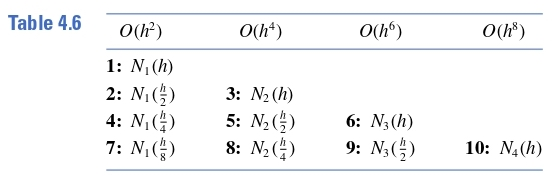

Sumber gambar: Burden, Richard L., Faires, J. Douglas. *Numerical Analysis*. Edisi ke-9. Bab 4, "Numerical Differentiation and Integration". Subbab 4.2, "Richardson's Extrapolation". Hlm. 188

Bahkan, seperti metode Neville, kita bisa membuat program sehingga, selain perhitungan disimpan dalam bentuk tabel (atau list di dalam list), kita juga bisa melakukan perhitungan selanjutnya berdasarkan data pada tabel. Contohnya, untuk perhitungan $N_2 (h)$ (baris kedua, kolom kedua), kita bisa menggunakan data "ke atas satu langkah, ke kiri satu langkah" untuk $N_1 (h)$, dan menggunakan data "ke kiri satu langkah" untuk $N_1 \left( \frac{h}{2} \right)$.

Seperti pada tabel di atas, perhitungan bisa dilakukan per baris. Bahkan, seperti pada metode Neville, kita selalu bisa menambahkan baris baru dengan mudah.

In [ ]:
from tabulate import tabulate

# jaga-jaga ada konstanta pi atau e pada data N1 yang diberikan
from numpy import pi, e

# fungsi untuk menambahkan baris baru pada tabel yang sudah ada
def TambahkanRichardsonO2j(tabel_lama, N1baru):
    # Duplikasi tabel lama menjadi tabel baru (karena akan dimodifikasi)
    tabel_baru = tabel_lama.copy()

    # Tambahkan kolom kosong pada baris-baris yang sudah ada
    for i in range(len(tabel_baru)):
        tabel_baru[i].append("")

    # Membuat baris baru...
    baris_baru = [N1baru]
    # ... dengan kolom sebanyak len(tabel_lama)+1:
    for i in range(len(tabel_lama)):
        baris_baru.append("")
    # meskipun saat ini kosong, setelah ini akan diisi sesuai rumus.
    # Tambahkan dulu ke tabel (sebagai baris paling bawah terbaru):
    tabel_baru.append(baris_baru)

    # Mengisi baris paling bawah
    k = len(baris_baru) # banyaknya titik termasuk titik baru
    i = k-1 # baris baru adalah baris ke-k, dengan indeks (k-1)
    for j in range(1, k): # untuk kolom N2 (indeks 1), N3 (indeks 2), ...
        # N_{j-1} (h) yaitu ke atas satu langkah, ke kiri satu langkah
        Nj1h = tabel_baru[i-1][j-1]

        # N_{j-1} (h/2) yaitu ke kiri satu langkah
        Nj1h2 = tabel_baru[i][j-1]

        # Pada rumus, "j" yang dimaksud bukanlah indeks, tapi kolom ke-j,
        # sehingga indeks 1 adalah kolom ke-2, indeks 2 adalah kolom ke-3, dst
        j_kolom = j+1

        # nilai baru, N_j (h), menggunakan rumus rekursif
        tabel_baru[i][j] = Nj1h2 + (Nj1h2 - Nj1h)/(4**(j_kolom-1) - 1)

    # Tabel sudah jadi
    return tabel_baru

# Kode utama untuk Ekstrapolasi Richardson O(h^2j)
def EkstrapolasiRichardsonO2j(list_N1):
    # Awal membuat tabel
    tabel_mentah = [
        [list_N1[0]]
    ]
    # mula-mula, hanya ada satu nilai yaitu N1 (h),
    # sehingga hanya ada satu baris dan satu kolom

    # banyaknya baris/kolom untuk tabel yang akan dibuat
    k = len(list_N1)

    # lakukan TambahkanRichardsonO2j untuk tiap titik berikutnya
    for i in range(1, k):
        tabel_mentah = TambahkanRichardsonO2j(tabel_mentah, list_N1[i])

    # Mengolah tabel menggunakan tabulate
    list_header = []
    for i in range(k):
        list_header.append("O(h^{0})".format(2*(i+1)))
    tabel_olahan = tabulate(tabel_mentah, headers=list_header,
                            tablefmt="orgtbl")
    print("Tabel Ekstrapolasi Richardson untuk O(h^2j)")
    print(tabel_olahan)

    # Looping

    jawaban = input("Apakah Anda ingin menambahkan nilai? (y/n): ")
    ingin_menambahkan = False
    if jawaban == "y":
        ingin_menambahkan = True

    while ingin_menambahkan:
        N1baru = eval(input("Masukkan nilai N1 (h/{0}): ".format(2**k)))
        print()

        tabel_mentah = TambahkanRichardsonO2j(tabel_mentah, N1baru)
        list_header.append("O(h^{0})".format(2**k))
        tabel_olahan = tabulate(tabel_mentah, headers=list_header,
                                tablefmt="orgtbl")
        print("Tabel Ekstrapolasi Richardson untuk O(h^2j)")
        print(tabel_olahan)

        jawaban = input("Apakah Anda ingin menambahkan nilai? (y/n): ")
        if jawaban != "y":
            ingin_menambahkan = False

        k += 1

    print()
    print("Terima kasih telah menggunakan program.")

In [ ]:
banyaknya_N1 = eval(input("Berapa nilai N1 yang ingin dimasukkan?: "))

list_N1 = []
for i in range(banyaknya_N1):
    pembagi = 2**i
    if pembagi != 1:
        pertanyaan = "Masukkan nilai N1 (h/{0}): ".format(pembagi)
    else:
        pertanyaan = "Masukkan nilai N1 (h): "
    N1baru = eval(input(pertanyaan))
    list_N1.append(N1baru)

print()
EkstrapolasiRichardsonO2j(list_N1)

Berapa nilai N1 yang ingin dimasukkan?: 3
Masukkan nilai N1 (h): 1.570796
Masukkan nilai N1 (h/2): 1.896119
Masukkan nilai N1 (h/4): 1.974232

Tabel Ekstrapolasi Richardson untuk O(h^2j)
|   O(h^2) | O(h^4)             | O(h^6)             |
|----------+--------------------+--------------------|
|  1.5708  |                    |                    |
|  1.89612 | 2.00456            |                    |
|  1.97423 | 2.0002696666666666 | 1.9999836444444443 |
Apakah Anda ingin menambahkan nilai? (y/n): y
Masukkan nilai N1 (h/8): 1.993570

Tabel Ekstrapolasi Richardson untuk O(h^2j)
|   O(h^2) | O(h^4)             | O(h^6)             | O(h^8)            |
|----------+--------------------+--------------------+-------------------|
|  1.5708  |                    |                    |                   |
|  1.89612 | 2.00456            |                    |                   |
|  1.97423 | 2.0002696666666666 | 1.9999836444444443 |                   |
|  1.99357 | 2.000016           | 1.99